In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
(training_images, training_labels), (test_images, test_labels) = data

In [6]:
training_images = training_images / 255.0
test_images = test_images / 255.0

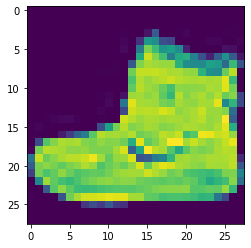

9


In [5]:
plt.imshow(training_images[0])
plt.show()
print(training_labels[0])

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')                             
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("Achieved 95%")
      self.model.stop_training = True

callbacks = myCallBack()

In [13]:
model.fit(training_images,training_labels,validation_data=(test_images, test_labels), epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8978 - val_loss: 0.3593 - val_accuracy: 0.8685
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9004 - val_loss: 0.3564 - val_accuracy: 0.8751
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2574 - accuracy: 0.9050 - val_loss: 0.3405 - val_accuracy: 0.8842
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2497 - accuracy: 0.9069 - val_loss: 0.3459 - val_accuracy: 0.8786
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9100 - val_loss: 0.3287 - val_accuracy: 0.8863
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2308 - accuracy: 0.9126 - val_loss: 0.3271 - val_accuracy: 0.8877
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.9153 - val_loss: 0.3756 - val_ac

In [11]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8724


[0.34765055775642395, 0.8723999857902527]